In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
for i in range(1,101):
  img = '/content/drive/My Drive/DataSet/Face/' + str(i) + '.jpg'
  print(img)

/content/drive/My Drive/DataSet/Face/1.jpg
/content/drive/My Drive/DataSet/Face/2.jpg
/content/drive/My Drive/DataSet/Face/3.jpg
/content/drive/My Drive/DataSet/Face/4.jpg
/content/drive/My Drive/DataSet/Face/5.jpg
/content/drive/My Drive/DataSet/Face/6.jpg
/content/drive/My Drive/DataSet/Face/7.jpg
/content/drive/My Drive/DataSet/Face/8.jpg
/content/drive/My Drive/DataSet/Face/9.jpg
/content/drive/My Drive/DataSet/Face/10.jpg
/content/drive/My Drive/DataSet/Face/11.jpg
/content/drive/My Drive/DataSet/Face/12.jpg
/content/drive/My Drive/DataSet/Face/13.jpg
/content/drive/My Drive/DataSet/Face/14.jpg
/content/drive/My Drive/DataSet/Face/15.jpg
/content/drive/My Drive/DataSet/Face/16.jpg
/content/drive/My Drive/DataSet/Face/17.jpg
/content/drive/My Drive/DataSet/Face/18.jpg
/content/drive/My Drive/DataSet/Face/19.jpg
/content/drive/My Drive/DataSet/Face/20.jpg
/content/drive/My Drive/DataSet/Face/21.jpg
/content/drive/My Drive/DataSet/Face/22.jpg
/content/drive/My Drive/DataSet/Face/23.j

In [4]:
import cv2
import numpy as np
import glob

width=200
height=200

Data=[]
for i in range(1,101):
  img = '/content/drive/My Drive/DataSet/Face/' + str(i) + '.jpg'
  im=cv2.imread(img)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  im=cv2.resize(im,(width,height))
  Data.append(im)

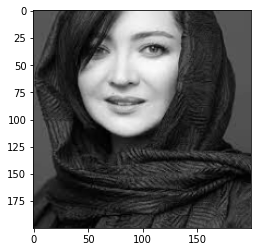

In [5]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(Data[15])
plt.gray()
plt.show()

In [6]:
Target=[]
counter=1
idx_Class=0
for i in range(1,101):
  if(counter==21):
    counter=1
    idx_Class=idx_Class+1
  Target.append(idx_Class)
  counter=counter+1


In [7]:
Artist_List=['Niki Karimi','Hedye Tehrani','Ana Nehamti','Megan Fox','Kardashian']

In [8]:
for i in range(0,100):
  print('Class ' + str(Target[i]) + '---> ' + Artist_List[Target[i]])

Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 0---> Niki Karimi
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani
Class 1---> Hedye Tehrani


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=0.3, random_state=42)

In [10]:
import numpy as np

In [11]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [12]:
X_train = X_train.reshape(len(X_train), width*height)
X_test = X_test.reshape(len(X_test), width*height)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier_Knn = KNeighborsClassifier(n_neighbors=3)
classifier_Knn.fit(X_train, y_train)
Out_Knn=classifier_Knn.predict(X_test)

[[4 1 0 1 1]
 [1 2 1 1 1]
 [2 1 1 1 1]
 [2 0 1 3 0]
 [1 0 0 2 2]]
 


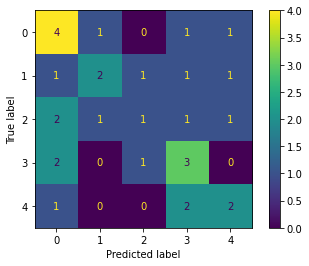

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print(confusion_matrix(y_test,Out_Knn))
print(' ')
cm_display=ConfusionMatrixDisplay(confusion_matrix(y_test,Out_Knn))
cm_display.plot()
plt.show()

In [15]:
from sklearn.metrics import classification_report, accuracy_score
print('Accuracy= ' + str(round(accuracy_score(y_test, Out_Knn)*100))) 

Accuracy= 40


In [16]:
print(classification_report(y_test,Out_Knn))

              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.50      0.33      0.40         6
           2       0.33      0.17      0.22         6
           3       0.38      0.50      0.43         6
           4       0.40      0.40      0.40         5

    accuracy                           0.40        30
   macro avg       0.40      0.39      0.38        30
weighted avg       0.40      0.40      0.39        30



In [17]:
from sklearn import svm
classifier_svm = svm.LinearSVC()
classifier_svm.fit(X_train, y_train)
Out_SVM=classifier_svm.predict(X_test)

[[3 1 0 0 3]
 [0 1 1 0 4]
 [2 1 1 2 0]
 [0 1 1 3 1]
 [0 1 0 1 3]]
 


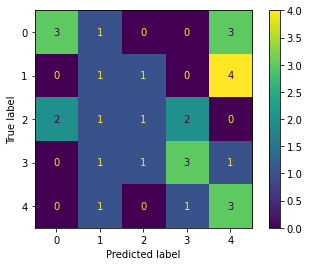

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print(confusion_matrix(y_test,Out_SVM))
print(' ')
cm_display=ConfusionMatrixDisplay(confusion_matrix(y_test,Out_SVM))
cm_display.plot()
plt.show()

In [19]:
print('Accuracy= ' + str(round(accuracy_score(y_test, Out_SVM)*100))) 

Accuracy= 37


In [20]:
print(classification_report(y_test,Out_SVM))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.20      0.17      0.18         6
           2       0.33      0.17      0.22         6
           3       0.50      0.50      0.50         6
           4       0.27      0.60      0.37         5

    accuracy                           0.37        30
   macro avg       0.38      0.37      0.36        30
weighted avg       0.39      0.37      0.36        30



In [21]:
from sklearn import tree
classifier_tree = tree.DecisionTreeClassifier()
classifier_tree.fit(X_train, y_train)
Out_TREE=classifier_tree.predict(X_test)

[[2 1 3 1 0]
 [0 2 2 0 2]
 [0 1 3 1 1]
 [2 3 0 1 0]
 [0 3 0 0 2]]
 


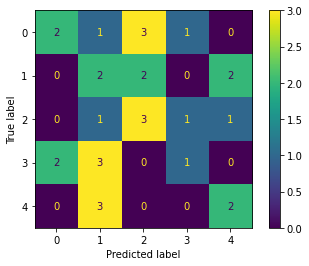

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print(confusion_matrix(y_test,Out_TREE))
print(' ')
cm_display=ConfusionMatrixDisplay(confusion_matrix(y_test,Out_TREE))
cm_display.plot()
plt.show()

In [23]:
print('Accuracy= ' + str(round(accuracy_score(y_test, Out_TREE)*100))) 

Accuracy= 33


In [24]:
print(classification_report(y_test,Out_TREE))

              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.20      0.33      0.25         6
           2       0.38      0.50      0.43         6
           3       0.33      0.17      0.22         6
           4       0.40      0.40      0.40         5

    accuracy                           0.33        30
   macro avg       0.36      0.34      0.33        30
weighted avg       0.36      0.33      0.33        30

